In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed

In [15]:
# Load data
df = pd.read_csv('/Users/afismacbook/Desktop/PROJECTS/DS/DATASETS/studydata.csv')
df

,studytime,score
0,34.842345,34.137006
1,55.766804,71.207596
2,63.870358,64.992382
3,49.815640,73.976632
4,62.153208,89.660925
...,...,...
95,52.370174,83.966991
96,51.579765,74.541832
97,52.379576,87.662007
98,50.489859,68.654958


In [16]:
# Initialize parameters
m = 0
b = 0
L = 0.0001
epochs = 1000
n = len(df)

In [17]:
# Gradient Descent function
def gradient_descent(m_now, b_now, df, L):
    m_gradient = 0
    b_gradient = 0
    for i in range(n):
        x = df.iloc[i, 0]
        y = df.iloc[i, 1]
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    m = m_now - (L * m_gradient)
    b = b_now - (L * b_gradient)
    return [m, b]

In [18]:
# Gradient Descent loop
for i in range(epochs):
    m, b = gradient_descent(m, b, df, L)

print("Final m:", m, "Final b:", b)

Final m: 1.4588653376404914 Final b: 0.07765368857654932


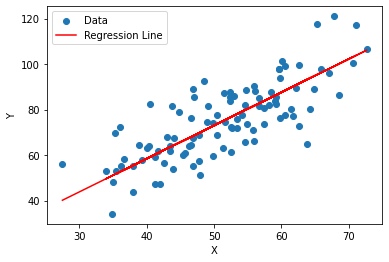

In [19]:
def plot_regression_line(m, b, df):
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], label='Data')
    plt.plot(df.iloc[:, 0], m * df.iloc[:, 0] + b, color='red', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
plot_regression_line(m, b, df)

In [20]:
interactive_plot = interactive(plot_regression_line, m=(-2.0, 2.0), b=(-10.0, 10.0), df=fixed(df))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…